## CURVAS IV 

In [2]:
# Importing the function and packages to be used. Make sure you have installed them!
import sys; sys.path.insert(0, '../'); from lib import *

In [4]:
##################
### CURVAS IV ####
##################

# Nombres de las columnas que vamos a leer
sipm_labels = ['RT - HPK Vbd (V)', 'RT - Vbd (V)', 'RT - Rq(KΩ)', 'LN2 - Vbd (V)', 'LN2 - Rq(KΩ)']

# Array vacio para ir rellenando
sipm_values = np.empty([6*5,len(sipm_labels)]) #solo anverso

# Nombres para nuestras filas, auxiliar
aux0 = ['SiPM #1','SiPM #2','SiPM #3','SiPM #4','SiPM #5','SiPM #6']

# Abrimos y leemos el fichero
workbook = xlrd.open_workbook('../data/Datos_IV.xlsx')
worksheet = workbook.sheet_by_index(0)

### SiPMs ###
for j in np.arange(30): # SiPMs x6
    for l in np.arange(len(sipm_labels)): # Etiquetas x6
        # aux = np.arange(6,12)
        sipm_values[j,l] = worksheet.cell(6+j,4+l).value

# Calculamos los valores medios y las desviaciones para los histogramas #
sipm_mean = sipm_values.mean(axis=0)
sipm_std =  sipm_values.std(axis=0)

In [5]:
# Data Frames #

df_iv = pd.DataFrame(sipm_values, columns = sipm_labels, index = 5*aux0)
# df_iv.to_csv('df_iv.txt', sep=" ", quoting=csv.QUOTE_NONE, escapechar=" ") #guardar .txt
# df_iv #ver df

df_iv_fin = pd.DataFrame(np.array((sipm_mean,sipm_std)), columns = sipm_labels, index=['Mean', 'STD'])
# df_iv_fin.to_csv('df_iv_fin.txt', sep=" ", quoting=csv.QUOTE_NONE, escapechar=" ") #guardar .txt
df_iv_fin
# pd.DataFrame(df_iv_fin['RT - HPK Vbd (V)']) # para ver la columna de ese nombre

,RT - HPK Vbd (V),RT - Vbd (V),RT - Rq(KΩ),LN2 - Vbd (V),LN2 - Rq(KΩ)
Mean,51.782667,52.048333,515.54764,42.041667,1960.387773
STD,0.087823,0.112163,10.52192,0.081735,67.407485


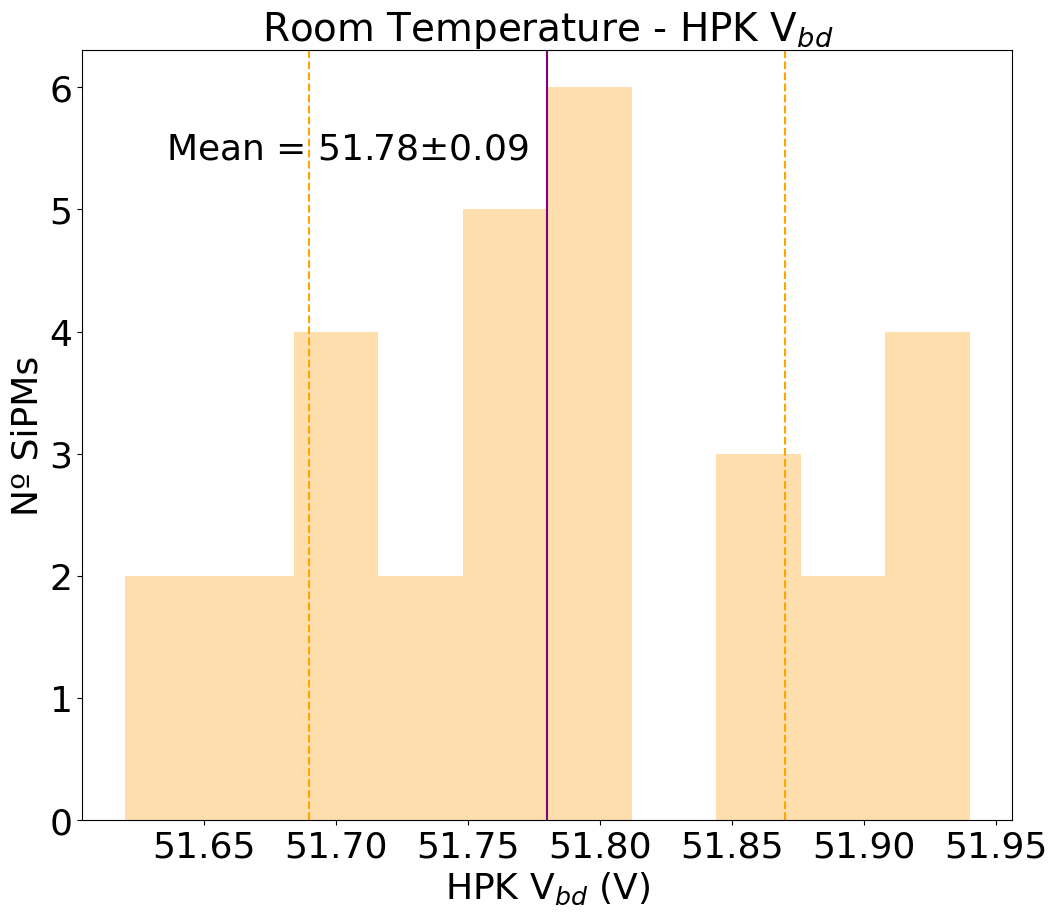

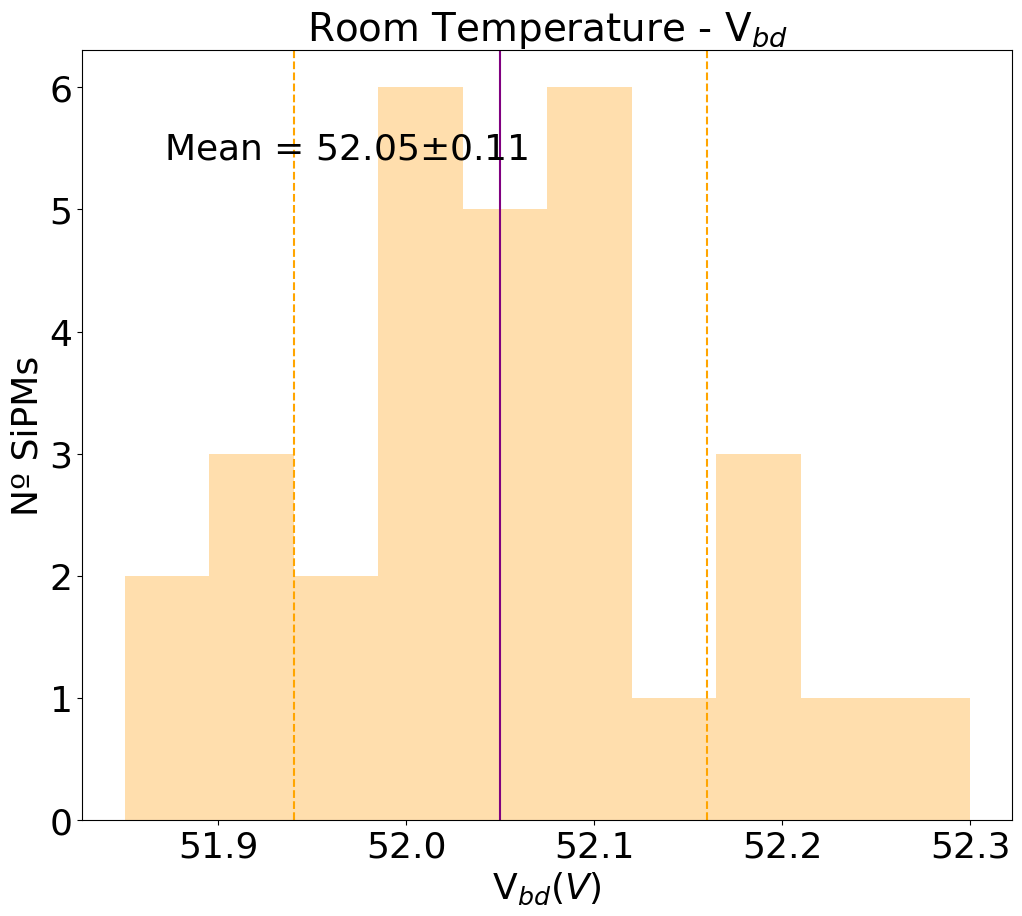

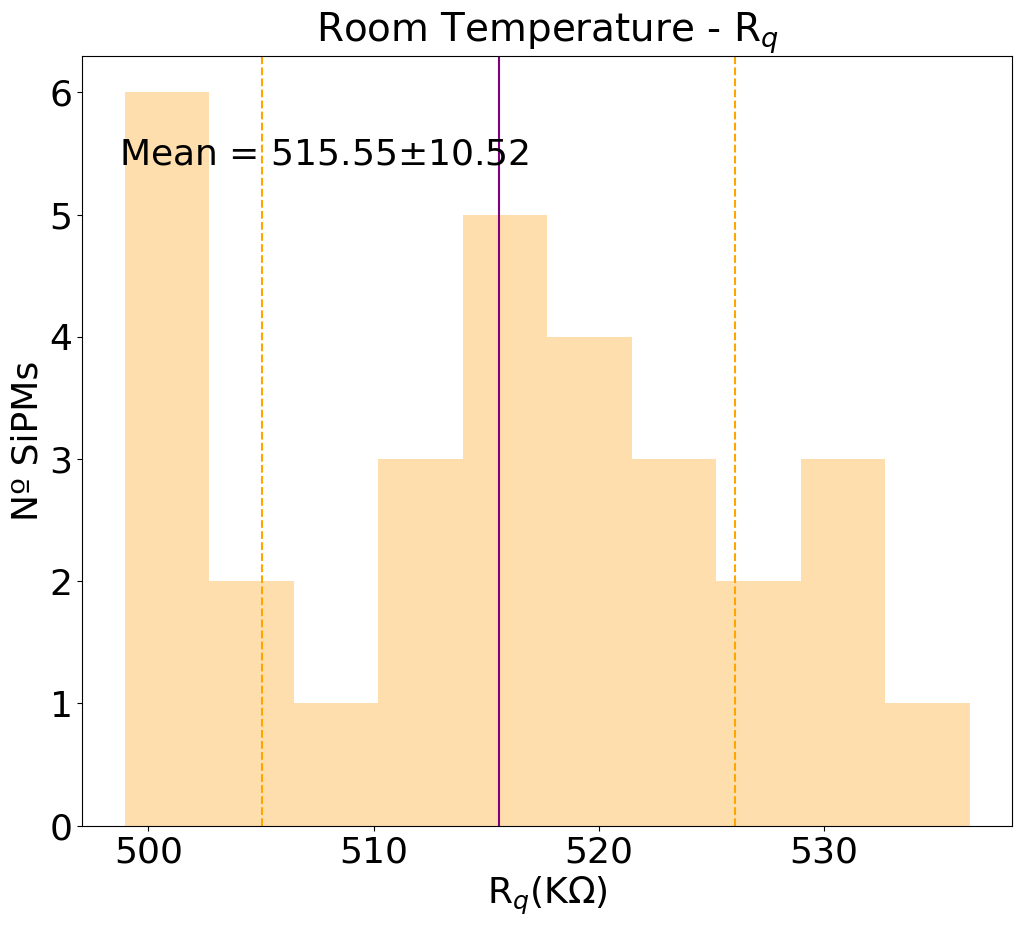

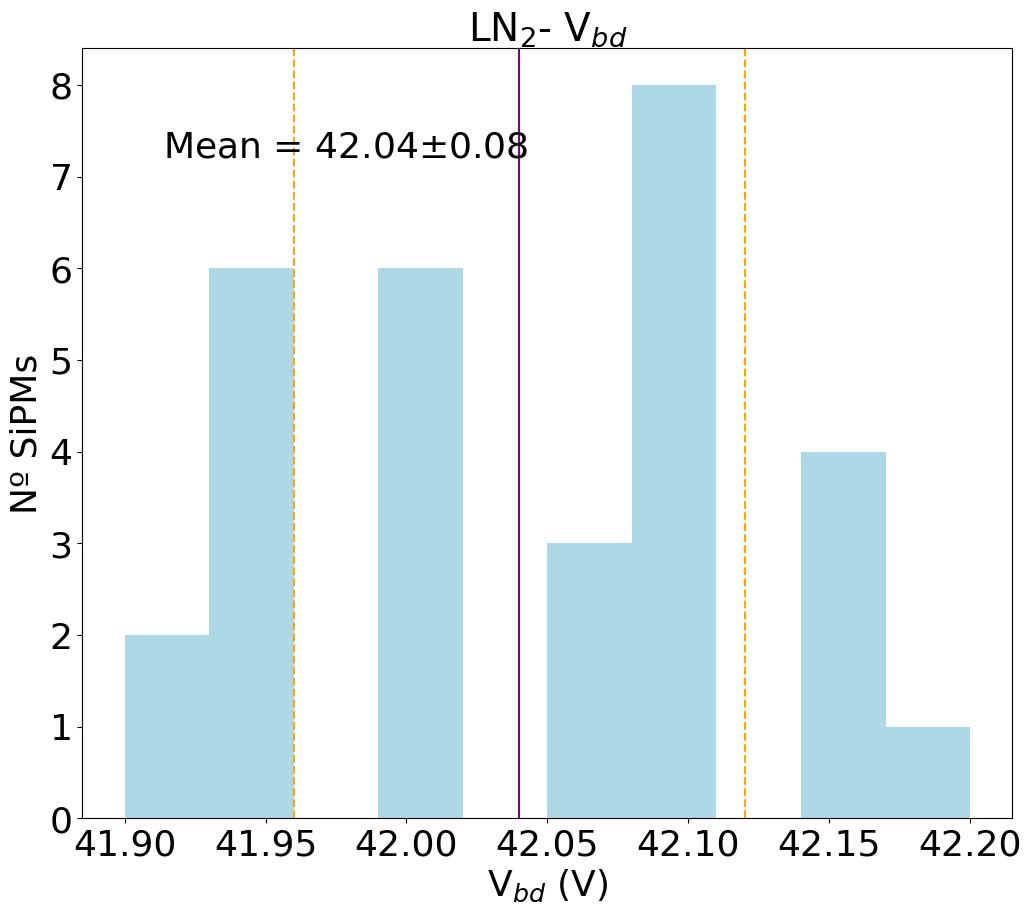

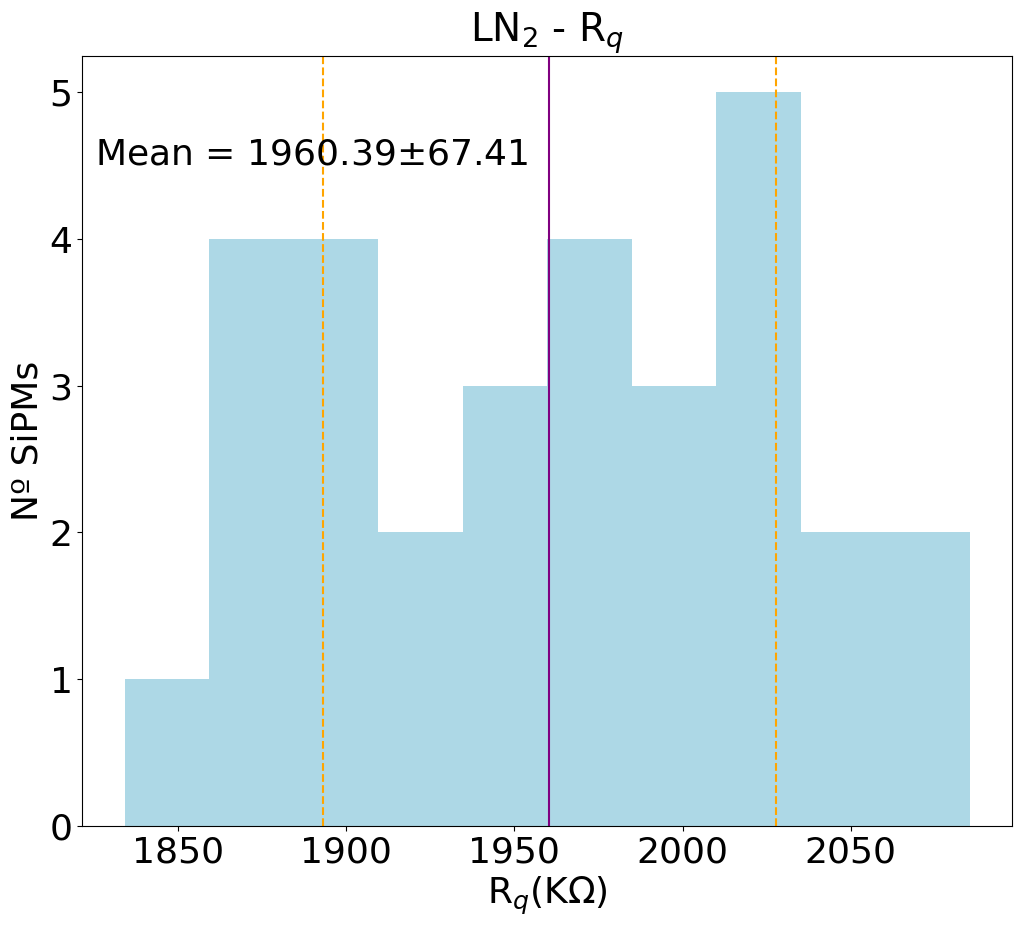

In [7]:
# FINAL STEP: plots
# Giving titles, labels and the previous generated dfs

titles = [r'Room Temperature - HPK V$_{bd}$', r'Room Temperature - V$_{bd}$', r'Room Temperature - R$_q$', r'LN$_2$- V$_{bd}$', r'LN$_2$ - R$_q$']
xlabel = [r'HPK V$_{bd}$ (V)', r'V$_{bd} (V)$', r'R$_q$(KΩ)', r'V$_{bd}$ (V)', r'R$_q$(KΩ)']
ylabel = ['Nº SiPMs', 'Nº SiPMs', 'Nº SiPMs', 'Nº SiPMs', 'Nº SiPMs']
df_raw = [pd.DataFrame(df_iv['RT - HPK Vbd (V)']), pd.DataFrame(df_iv['RT - Vbd (V)']), pd.DataFrame(df_iv['RT - Rq(KΩ)']), pd.DataFrame(df_iv['LN2 - Vbd (V)']), pd.DataFrame(df_iv['LN2 - Rq(KΩ)'])]
df_fin = [pd.DataFrame(df_iv_fin['RT - HPK Vbd (V)']), pd.DataFrame(df_iv_fin['RT - Vbd (V)']), pd.DataFrame(df_iv_fin['RT - Rq(KΩ)']), pd.DataFrame(df_iv_fin['LN2 - Vbd (V)']), pd.DataFrame(df_iv_fin['LN2 - Rq(KΩ)'])]
colums = ['RT - HPK Vbd (V)', 'RT - Vbd (V)', 'RT - Rq(KΩ)', 'LN2 - Vbd (V)', 'LN2 - Rq(KΩ)']
colors = [['navajowhite','purple','orange'],['navajowhite','purple','orange'],['navajowhite','purple','orange'],['lightblue','purple','orange'],['lightblue','purple','orange']]
for i in range(len(titles)):
    plotitos(titles[i],xlabel[i],ylabel[i],df_raw[i],df_fin[i],colums[i],colors[i])